In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as plat

import sympy as sym

f(x*) =  5 



/var/folders/ws/jnwx185n21lfrzd6xh5jj9lw0000gn/T/ipykernel_16286/674099530.py:46: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


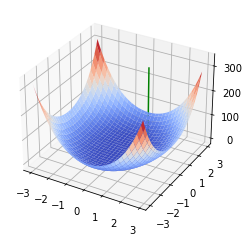

In [74]:
## Define Python function


def func_1(x):
    x1 = x[0]
    x2 = x[1]
    
    a = x1**2 + (x2 + 1)**2
    b = x1**2 + (x2 - 1)**2
    
    f = a*b
    
    return f


#we investigate the point that  is a candidate for a minimum

xtest = np.array([1, 1])

ftest = func_1(xtest)
print("f(x*) = ",func_1(xtest),"\n")

## Make 3D plot to visualize
x1 = np.arange(-3,3,0.1)
x2 = np.arange(-3,3,0.1)

# Create a matrix of all points to sample
X1, X2 = np.meshgrid(x1, x2)
n1 = len(x1)
n2 = len(x2)


F = np.zeros([n2, n1])

xtemp = np.zeros(2)

# Evaluate f(x) over grid
for i in range(0,n1):
    xtemp[0] = x1[i]
    for j in range(0,n2):
        xtemp[1] = x2[j]
        F[j,i] = func_1(xtemp)

# Create 3D figure
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot f(x)
surf = ax.plot_surface(X1, X2, F, linewidth=0,cmap=cm.coolwarm,antialiased=True)

# Add candidate point
ax.scatter(xtest[0],xtest[1],ftest,s=50,color="green",depthshade=True)


fmax = np.amax(F)
fmin = np.amin(F)
ax.plot([xtest[0], xtest[0]], [xtest[1], xtest[1]], [fmin,fmax],color="green")

plt.show()

The following code Calculate gradient of function func_1 using central difference formula

Inputs:
    x - point for which to evaluate gradient

Outputs:
    grad - gradient (vector)

Assumptions:
    1. func_1 is defined
    2. input x has the correct number of elements for func_1
    3. func_1 is continous and differentiable  

In [69]:
## Gradient is found using the central difference approximation of the derivative
def grad_central(x):
    
    
    eps = 1E-6
    n = len(x)
    grad = np.zeros(n)

  #  if(verbose):
     #   print("***** grad_central at x = ",x,"*****")
    
    for i in range(0,n):
        
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps
        
        # Finite difference formula with central difference
        f_plus = func_1(x + e)
        f_minus = func_1(x - e)
        
        
        
        grad[i] = (f_plus - f_minus)/(2*eps)
    
    
    
    return grad

grad = grad_central(xtest)
print(grad)

[12.  4.]


Calculate Hessian of function func_1 using central difference formula grad_central

Inputs:
    x - point for which to evaluate gradient

Outputs:
    H - Hessian (matrix)

Assumptions:
    1. func_1 and my_grad is defined
    2. input x has the correct number of elements for func_1
    3. func_1 is continous and twice differentiable
    4. No mistakes in grad_central

In [70]:
def hessian_central(x):
    
    
    eps = 1E-6
    n = len(x)
    H = np.zeros([n,n])
    
    for i in range(0,n):
        # Create vector of zeros except eps in position i
        e = np.zeros(n)
        e[i] = eps
        
        # Evaluate gradient twice
        grad_plus = grad_central(x + e)
        grad_minus = grad_central(x - e)
        
        # Notice we are building the Hessian by column (or row)
        H[:,i] = (grad_plus - grad_minus)/(2*eps)
    
    
    
    return H

H = hessian_central(xtest)
print(H)

[[19.99933552  8.00004507]
 [ 8.00004507 11.99951249]]


In [71]:
#Using symbolic python to find gradient

def f(x1,x2):

    a = x1**2 + (x2 + 1)**2
    b = x1**2 + (x2 - 1)**2
    
    func = a*b
    
    return func

# Define function to use later
def grad_exact(x):
    x1, x2 = sym.symbols('x1 x2')
    DerivativeOfF1 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1));
    DerivativeOfF2 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([DerivativeOfF1(x[0],x[1]),DerivativeOfF2(x[0],x[1])])
    
print("The exact gradient is \n",grad_exact(xtest))

The exact gradient is 
 [12  4]


In [72]:
def f(x1,x2):
    
    a = x1**2 + (x2 + 1)**2
    b = x1**2 + (x2 - 1)**2
    
    func = a*b
    
    return func


def hes_exact(x):
    x1, x2 = sym.symbols('x1 x2')
    HessianOfF11 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x1));
    HessianOfF12 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x1,x2));
    HessianOfF21 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x1));
    HessianOfF22 = sym.lambdify((x1,x2),sym.diff(f(x1,x2),x2,x2));
    #DerivativeOfF2 = sym.lambdify((x1,x2),gradf2(x1,x2));
    #F = sym.lambdify((x1,x2),f(x1,x2));
    return np.array([[HessianOfF11(x[0],x[1]),HessianOfF12(x[0],x[1])],[HessianOfF21(x[0],x[1]),HessianOfF22(x[0],x[1])]])
    
print("The exact Hessian is \n",hes_exact(xtest))

The exact Hessian is 
 [[20  8]
 [ 8 12]]


Compute the eigenvalues of the Hessian

In [73]:
# Computing Eiegenvalues of the Hessian Matrix 
print(" Hessian Matrix = \n",H,"\n")
l, v = linalg.eig(H)
print("Eigenvalues = ",l,"\n")
print("Eigenvectors = \n",v,"\n")

 Hessian Matrix = 
 [[19.99933552  8.00004507]
 [ 8.00004507 11.99951249]] 

Eigenvalues =  [24.94369666+0.j  7.05515136+0.j] 

Eigenvectors = 
 [[ 0.85064789 -0.52573583]
 [ 0.52573583  0.85064789]] 



Activity 1

(a) Gradient is 0, Hessian is not positive definite  => Not a minimum
(b) Gradient is 0, Hessian is positive definite      => A minimum
(c) Gradient is 0, Hessian is positive definite      => A minimum
(d) Gradient is not 0, Hessian is positive definite  => Not a minimum

There are two local minimums. Thus, the given function is not convex. (For the function to be convex there should be only a global minimum)